In [ ]:
!git clone https://github.com/Chuenchat/Lab-Introduction-Image-Processing

# Basic Python

##Number

In [ ]:
print(1+3) # plus
print(2-1) # minus
print(3*6) # multiply
print(2**3) # power
print(17/3) # divide
print(17//3) # floor divide
print(10%3) #modulo
print(abs(-5)) #absolute
print(max(6,5)) #max value

##Numpy Array

In [ ]:
import numpy as np

array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 3.14, 9.3, 78])
print(array.shape)
array

In [ ]:
# shape
print(array.shape)

In [ ]:
#arithmatic
print(array + 15)
print('----------------------------------------')
print(20 - array)
print('----------------------------------------')
print(array * 10)

In [ ]:
array

In [ ]:
#index
print(array[3])
print('----------------------------------------')
print(array[:3])
print('----------------------------------------')
print(array[::3])
print('----------------------------------------')
print(array[::-1])

In [ ]:
# concatenate
print(np.concatenate([array, array], axis=0))

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
array[1] = 2000
print(array)

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
array[4:8] = [1111, 2222, 3333, 4444]
print(array)

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
print("original", array)
array[::2] = 0
print("modify", array)

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, -12, 30])
print("original", array)
array[array> 10] = 50
print("modify", array)

##2D Array

In [ ]:
array2d = np.array([
           [1, 2, 3],
           [3, 4, 5],
           [5, 6, 7],
           [7, 8, 9],
])
print(array2d)

In [ ]:
# shape
print(array2d.shape)

In [ ]:
#arithmatic
print(array2d + 10)
print('----------------------------------------')
print(array2d * 10)

In [ ]:
# index
print(array2d[-1, -1])
print('----------------------------------------')
print(array2d[1:, :2])
print('----------------------------------------')
print(array2d[::-1, ::-1])

In [ ]:
# concatenate
print(np.concatenate([array2d, array2d], axis=0))
print('----------------------------------------')
print(np.concatenate([array2d, array2d], axis=1))

In [ ]:
# zeros
zeros = np.zeros([4, 4], np.uint8)
print(zeros)

In [ ]:
# ones
ones = np.ones([4, 4], np.uint8)
print(ones)

In [ ]:
# full
full = np.full([4, 4], 5, np.uint8)
print(full)

##Exercises

###**1.)** Fibonacci

> Create an 1D Array of 30 first number in Fibonacci sequence.

In [ ]:
n = 30
members = [1, 1]
for i in range(n-2):
  members.append(members[-1]+members[-2])
print(np.array(members))

###**2.)** 1.3 to 8.2

> Create an 1D Array of 30 evenly spaced elements between 1.3 and 8.2 inclusive.

In [ ]:
np.linspace(1.3, 8.2, 30)

###**3.)** Chess Board

> Create Chess-like Pattern on 8x8 2D Array

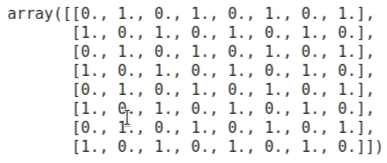

#Introduction to Image Processing.

## Grayscale Image
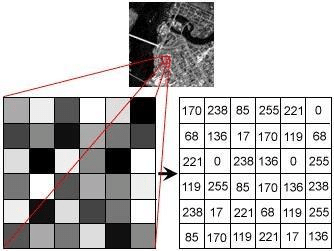

In [ ]:
import matplotlib.pyplot as plt

img = np.array([[0, 64, 128, 192],
                [32, 96, 160, 224],
                [48, 112, 176, 240],
                [60, 124, 188, 255]])

print("Pixel at (2,3):", img[2, 3])
print("Average intensity:", np.mean(img))

plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()


In [ ]:
image = np.array([[50, 80, 120, 180, 200],
                  [60, 90, 130, 190, 210],
                  [70, 100, 140, 200, 220],
                  [80, 110, 150, 210, 230],
                  [90, 120, 160, 220, 240]])

image_inverted = 255 - image
image_binary = np.where(image > 150, 255, 0)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(image_inverted, cmap='gray')
plt.title("Inverted")

plt.subplot(1,3,3)
plt.imshow(image_binary, cmap='gray')
plt.title("Binary")

plt.colorbar()
plt.tight_layout()  # ปรับระยะห่างอัตโนมัติ
plt.show()

### Load an Image.

<!-- run: image -->
<!-- run: image.shape -->

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [ ]:
import os
import cv2
import numpy as np
import plotly.express as px

# example paths
folder = 'Lab-Introduction-Image-Processing/images/'
lenna = folder + 'lenna.png'

# load an image
image = cv2.imread(lenna, cv2.IMREAD_GRAYSCALE)
print(image.shape)

# plot
fig = px.imshow(image, color_continuous_scale='gray')
fig.show()

### Plot Intensity in 3D


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=image, colorscale='gray')])
fig.update_layout(
    autosize=False,
    height=700,
)
fig.update_scenes(xaxis_autorange="reversed")
fig.show()

## ทำไมต้องใช้ Interpolation?

ภาพดิจิทัลประกอบด้วย พิกเซล (pixels) ซึ่งเป็นจุดเล็ก ๆ ที่มีค่าความสว่างหรือสี

เมื่อเราย่อภาพ → พิกเซลต้อง ถูกรวมกัน

เมื่อเราขยายภาพ → ต้อง สร้างพิกเซลใหม่ ระหว่างพิกเซลเดิม

แต่พิกเซลใหม่ไม่ได้มีอยู่จริงในภาพต้นฉบับ ดังนั้นคอมพิวเตอร์ต้อง “ประมาณค่า” ของมันจากพิกเซลใกล้เคียง
นี่แหละครับคือสิ่งที่เรียกว่า Interpolation

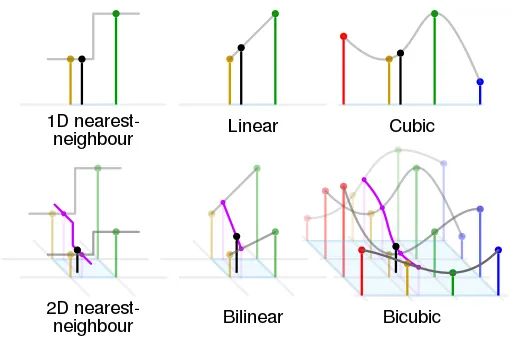

https://iq.opengenus.org/different-interpolation-methods-in-opencv/

In [ ]:
n_size = 64
low_res = cv2.resize(image, (n_size, n_size), interpolation=cv2.INTER_LINEAR)

restored = cv2.resize(low_res, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR) 
# cv2.INTER_LINEAR, cv2.INTER_NEAREST, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4, cv2.INTER_LINEAR_EXACT

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("High Resolution (Original)")
axes[0].axis("off")

axes[1].imshow(low_res, cmap='gray')
axes[1].set_title(f"Low Resolution ({n_size}×{n_size})")
axes[1].axis("off")

axes[2].imshow(restored, cmap='gray')
axes[2].set_title("Low Res Resized Back (Loss of Detail)")
axes[2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from skimage.metrics import structural_similarity as ssim

ssim_1, _ = ssim(image, restored, full=True)      # เงื่อนไข 1: image vs restored
ssim_2, _ = ssim(cv2.resize(image, (n_size, n_size), interpolation=cv2.INTER_AREA), low_res, full=True)        # เงื่อนไข 2: image vs low_res (ขนาดต่างกัน → ต้อง resize ก่อน)
ssim_3, _ = ssim(low_res, cv2.resize(restored, (n_size, n_size), interpolation=cv2.INTER_AREA), full=True)  # เงื่อนไข 3: low_res vs restored (ปรับขนาดให้เท่ากัน)
ssim_4, _ = ssim(image, image, full=True)           # เงื่อนไข 4: image vs image (ควรได้ 1.0000)

print("🔍 SSIM Comparison Results")
print(f"1️⃣ image vs restored        : {ssim_1:.4f}")
print(f"2️⃣ image vs low_res         : {ssim_2:.4f}")
print(f"3️⃣ low_res vs restored      : {ssim_3:.4f}")
print(f"4️⃣ image vs image (control) : {ssim_4:.4f}")

### Example 1: The Hidden Message

<!-- ---------------------------------------- -->
<!-- image *= 15 -->
<!-- ---------------------------------------- -->
<!-- image[image > 17] = 255 -->
<!-- image *= 15 -->
<!-- ---------------------------------------- -->
<!-- image[image < 17] = image[image < 17] * 15 -->
<!-- ---------------------------------------- -->
<!-- https://github.com/thearn/webcam-pulse-detector -->


In [ ]:
# load an image
fireflies = folder + 'movies/grave_of_the_fireflies.jpg'
image = cv2.imread(fireflies, cv2.IMREAD_GRAYSCALE)
print(type(image), image.shape, image.dtype)

# plot
fig = px.imshow(image, color_continuous_scale='gray', height=800)
fig.show()

In [ ]:
from plotly.subplots import make_subplots
test = np.array([[10, 25, 50],
                  [100, 200, 255],
                  [15, 30, 60]], dtype=np.uint8)
print(test < 17)
print(test[test < 17])

dark_pixels = test[test < 17]
print("จำนวนพิกเซลที่มืดมาก:", dark_pixels.size)


threshold = 60
binary_image = (test > threshold).astype(np.uint8) * 255


fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Original Image", f"Binary Threshold > {threshold}"))

fig.add_trace(go.Heatmap(z=test, colorscale='gray', showscale=False), row=1, col=1)

fig.add_trace(go.Heatmap(z=binary_image, colorscale='gray', showscale=False), row=1, col=2)

fig.update_layout(height=400, width=700, title_text="Original vs Binary Image")
fig.show()

In [ ]:
# image enhancement


## Color Space

> The math models for describing color.

  - RGB is the most common way to describe the chromaticity of the color. It consists of
three values that represent the light intensity of each frequency. For example, R is referred
to red color which have the wavelength peaking around 570 nm, G is green having peaking
around 540 nm, and B is blue having peaking around 430 nm. By mixing these 3 values, we
can generate any colors within the human perception. This color space is also used as the
base unit of display monitors.

  - HSV is an alternative way to explain colors. This color space can be modeled into the
cylinder shape, which has the rainbow radial slice as the upper face, pure black as the lower
face, and other colors are in between. This model was designed to reflect the way humans
describe each color. It is seperated into 3 components. H or hue represents color as angle. S
or saturation represents expressiveness of color, it is covering from neutral to colorful. V or
value represents lightness, it is covering from dark to bright.

![](https://miro.medium.com/max/1700/1*W30TLUP9avQwyyLfwu7WYA.jpeg)


### Red, Green, Blue

<!-- image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) -->

In [ ]:
# example paths
folder = 'Lab-Introduction-Image-Processing/images/'
apple = folder + 'apples01.jpg'

# load an image
image = cv2.imread(apple)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR 2 RGB for CV library


# plot
fig = px.imshow(image)
fig.show()

In [ ]:
# check image space
height, width, depth = image.shape
print('Height =', height, 'pixels')
print('Width  =', width, 'pixels')
print('Depth  =', depth, 'channels')

In [ ]:
from plotly.subplots import make_subplots

# initiate figures
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Red", "Green", "Blue")
)

# process
channels = cv2.split(image)

# plot
for i in range(len(channels)):
  fig.add_trace(
      px.imshow(channels[i]).data[0],
      row=1, col=i+1
  )
fig.update_yaxes(autorange='reversed')
fig.update_layout(coloraxis = {'colorscale':'gray'}, width=1200)
fig.show()

### Hue, Saturation, Value

In [ ]:
import matplotlib.pyplot as plt
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

hue_shift = (h.astype(np.int16) + 40) % 180   # OpenCV ใช้ H = 0–179 สีของแอปเปิ้ลเปลี่ยนเฉด เช่น เขียวอาจกลายเป็นฟ้า หรือแดงกลายเป็นม่วง
hue_shift = hue_shift.astype(np.uint8)
image_hue = cv2.merge([hue_shift, s, v])
result_hue = cv2.cvtColor(image_hue, cv2.COLOR_HSV2RGB)


s_sat = np.clip(s.astype(np.float32) * 1.5, 0, 255).astype(np.uint8) # สีสดและเข้มขึ้น โดยเฉพาะพื้นผิวแอปเปิ้ลและหยดน้ำ
image_sat = cv2.merge([h, s_sat, v])
result_sat = cv2.cvtColor(image_sat, cv2.COLOR_HSV2RGB)


v_val = np.clip(v.astype(np.float32) + 50, 0, 255).astype(np.uint8) # ภาพโดยรวมสว่างขึ้น มองเห็นรายละเอียดในส่วนมืดมากขึ้น เมื่อเพิ่ม Value ทุกจุดในภาพจะสว่างขึ้น รวมถึงบริเวณดำสนิทด้วย → พื้นที่ดำ (V=0) จึงกลายเป็นเทา (V=ค่าที่เพิ่ม)
image_val = cv2.merge([h, s, v_val])
result_val = cv2.cvtColor(image_val, cv2.COLOR_HSV2RGB)


In [ ]:
def make_image_trace(rgb_img, title_prefix):
    """
    รับภาพ RGB (uint8), คืนค่า:
      - go.Image พร้อม customdata = [H,S,V] (ต่อพิกเซล) และ hovertemplate
      - ชื่อกราฟที่แนบค่าเฉลี่ย H,S,V
    """
    hsv_ = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    H, S, V = cv2.split(hsv_)
    # สถิติ (ค่าเฉลี่ย)
    Hm, Sm, Vm = H.mean(), S.mean(), V.mean()

    # เตรียม customdata: shape (H, W, 3) โดยแกนสุดท้ายคือ [H,S,V]
    custom = np.dstack([H, S, V])

    trace = go.Image(
        z=rgb_img,
        customdata=custom,
        hovertemplate=(
            "x=%{x}, y=%{y}<br>"
            "H=%{customdata[0]:.0f}<br>"
            "S=%{customdata[1]:.0f}<br>"
            "V=%{customdata[2]:.0f}<extra></extra>"
        )
    )

    # ทำ subtitle ที่บอกค่าเฉลี่ย H,S,V
    subtitle = f"{title_prefix}<br><sup>mean H={Hm:.1f}, S={Sm:.1f}, V={Vm:.1f}</sup>"
    return trace, subtitle

# --------------------------------------------------------------------------------
# สร้าง subplots 2x2 และเพิ่มกราฟ
# --------------------------------------------------------------------------------
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Original", "Hue change", "Saturation change", "Value change"),
    horizontal_spacing=0.02, vertical_spacing=0.06
)

# Original
tr0, st0 = make_image_trace(image, "Original")
fig.add_trace(tr0, row=1, col=1)

# Hue
tr1, st1 = make_image_trace(result_hue, "Hue change")
fig.add_trace(tr1, row=1, col=2)

# Saturation
tr2, st2 = make_image_trace(result_sat, "Saturation change")
fig.add_trace(tr2, row=2, col=1)

# Value
tr3, st3 = make_image_trace(result_val, "Value change")
fig.add_trace(tr3, row=2, col=2)


# จัด layout ให้ดูสะอาดตา
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.update_layout(
    title="HSV Comparison (interactive)",
    width=1100, height=800,
    margin=dict(l=10, r=10, t=80, b=10)
)

fig.show()

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Hue", "Saturation", "Value")
)

# process
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
channels = cv2.split(hsv_image)

# plot
for i in range(len(channels)):
  fig.add_trace(
      px.imshow(channels[i]).data[0],
      row=1, col=i+1
  )
fig.update_yaxes(autorange='reversed')
fig.update_layout(coloraxis = {'colorscale':'gray'}, width=1200)
fig.show()

### Example 2: Color Manipulaion

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Original", "Processed 1", "Processed 2", "Processed 3")
)

# load an image
image_path = folder + 'movies/it.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
red, green, blue = cv2.split(image)
out1 = cv2.merge([red, blue, green])
out2 = cv2.merge([green, red, blue])
out3 = cv2.merge([blue, green, red])

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
# fig.add_trace(
#     px.imshow(out1).data[0],
#     row=1, col=2
# )
# fig.add_trace(
#     px.imshow(out2).data[0],
#     row=1, col=3
# )
# fig.add_trace(
#     px.imshow(out3).data[0],
#     row=1, col=4
# )
fig.show()

## Pixels Transformation

In [ ]:
# load an image
image_path = folder + '9gag.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot
fig = px.imshow(image)
fig.show()

In [ ]:
# check image space
height, width, depth = image.shape
print('Height =', height, 'pixels')
print('Width  =', width, 'pixels')
print('Depth  =', depth, 'channels')

###Resize and Rotate

In [ ]:
# initiate figures
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Original", "Resize", "Rotate", "Rotate + Resize")
)

# resize
out1 = cv2.resize(image, (1500, 200))

# rotate
out2 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# rotate + resize
out3 = cv2.resize(out2, (2500, 200))

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
# fig.add_trace(
#     px.imshow(out1).data[0],
#     row=1, col=2
# )
# fig.add_trace(
#     px.imshow(out2).data[0],
#     row=2, col=1
# )
# fig.add_trace(
#     px.imshow(out3).data[0],
#     row=2, col=2
# )
fig.update_layout(width=1000)
fig.show()

#Flip

<!-- out = image[::-1] -->


In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Flip Vertical")
)

# load an image
image_path = folder + 'movies/spider_man_into_the_spider_verse.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
out = cv2.flip(image, 0) # vertical flip

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
# fig.add_trace(
#     px.imshow(out).data[0],
#     row=1, col=2
# )
fig.update_layout(width=1000)
fig.show()

###Cut and Concatanate

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Original", "Left", "Right", "Concatanate")
)

# load an image
image_path = folder + 'movies/after_earth.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
cut1 = image[:, :200]
cut2 = image[:, 200:]
concat = np.concatenate((cut2, cut1), axis=1)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
# fig.add_trace(
#     px.imshow(cut1).data[0],
#     row=1, col=2
# )
# fig.add_trace(
#     px.imshow(cut2).data[0],
#     row=1, col=3
# )
# fig.add_trace(
#     px.imshow(concat).data[0],
#     row=1, col=4
# )
fig.show()

###Crop and Patch

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Original", "White Queen", "Checkmate!")
)

# load an image
image_path = folder + 'chess.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# resize
board = cv2.resize(image, (801, 801))

# crop
queen = board[700:800, 300:400]

# patch
new_board = board.copy()
new_board[0:100, 400:500] = queen

# plot
fig.add_trace(
    px.imshow(board).data[0],
    row=1, col=1
)
# fig.add_trace(
#     px.imshow(queen).data[0],
#     row=1, col=2
# )
# fig.add_trace(
#     px.imshow(new_board).data[0],
#     row=1, col=3
# )
fig.show()

###Invert

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Inverse")
)

# load an image
image_path = folder + 'movies/the_godfather.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
out = 255 - image

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
# fig.add_trace(
#     px.imshow(out).data[0],
#     row=1, col=2
# )
fig.update_layout(width=1000)
fig.show()

###Histograms Equalization

<!-- low contrast -->
<!-- backlit -->
<!-- overexposure & underexposure -->
<!-- grave_of_the_fireflies -->

<!--
# process
channels = cv2.split(image)
for i in range(len(channels)):
  channels[i] = cv2.equalizeHist(channels[i])
out = cv2.merge(channels)
 -->

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Balanced")
)

# load an image
image_path = folder + 'giraffe.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# process
out = cv2.equalizeHist(image)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.update_yaxes(autorange='reversed')
fig.update_layout(coloraxis = {'colorscale':'gray'}, width = 700)
fig.show()

In [ ]:
def plot_hist_comparison(image, out):
    
    # --- คำนวณ Histogram ของภาพทั้งสอง ---
    hist_original = cv2.calcHist([image], [0], None, [256], [0, 256]).ravel()
    hist_equalized = cv2.calcHist([out], [0], None, [256], [0, 256]).ravel()

    # --- สร้าง subplot 1 แถว 2 คอลัมน์ ---
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Original Histogram", "Equalized Histogram"),
        horizontal_spacing=0.05
    )

    # --- เพิ่มกราฟ Histogram ---
    fig.add_trace(
        go.Scatter(x=list(range(256)), y=hist_original, mode='lines',
                   line=dict(color='black'), name='Original Histogram'),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=list(range(256)), y=hist_equalized, mode='lines',
                   line=dict(color='black'), name='Equalized Histogram'),
        row=1, col=2
    )

    # --- ตั้งค่าชื่อแกน ---
    fig.update_xaxes(title_text="Pixel Intensity", row=1, col=1)
    fig.update_xaxes(title_text="Pixel Intensity", row=1, col=2)
    fig.update_yaxes(title_text="Count", row=1, col=1)
    fig.update_yaxes(title_text="Count", row=1, col=2)

    # --- ตั้งค่ารูปแบบกราฟ ---
    fig.update_layout(
        width=900, height=450,
        title_text="Histogram Equalization Comparison",
        showlegend=False,
        template="simple_white"
    )

    fig.show()

In [ ]:
plot_hist_comparison(image, out)

In [ ]:
# Initialize figure with 2 3D subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

# adding surfaces to subplots.
fig.add_trace(
    go.Surface(z=image, colorscale='gray', cmin=0, cmax=255),
    row=1, col=1)
fig.add_trace(
    go.Surface(z=out, colorscale='gray', cmin=0, cmax=255),
    row=1, col=2)
fig.update_layout(
    scene = dict(zaxis = dict(range=[0,255])))
fig.update_scenes(
    xaxis_autorange="reversed",
    aspectratio=dict(x=1, y=1, z=1))
fig.show()

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Balanced")
)

# load an image
image_path = folder + 'backlit1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
channels = list(cv2.split(image))
for i in range(len(channels)):
  channels[i] = cv2.equalizeHist(channels[i])
out = cv2.merge(channels)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.update_layout(width=1000)
fig.show()

In [ ]:
plot_hist_comparison(image, out)

### Blur

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Blur")
)

# load an image
image_path = folder + 'movies/fight_club.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
out = cv2.blur(image, (50, 50))
out[:, :300] = image[:, :300]

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
# fig.add_trace(
#     px.imshow(out).data[0],
#     row=1, col=2
# )
fig.update_layout(width=1000)
fig.show()

##Exercises

###**4.)** Light Up!

In [ ]:
# Enhance this image.

# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Output")
)

# load an image
image_path = 'Lab-Introduction-Image-Processing/images/hela/01.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# code your algorithm here.
out = image.copy()

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.show()

In [ ]:
# code your algorithm here.
out = 

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.show()

plot_hist_comparison(image, out)

###**5.)** Revert these apples.

> Make them green.

In [ ]:
# Turn these apples green.

# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Output")
)

# load an image
image_path = 'Lab-Introduction-Image-Processing/images/apples02.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)

fig.show()

In [ ]:
# ------------------------------
# Convert to HSV
# ------------------------------
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

# ------------------------------
# Detect red color region (Hue ~0–10 and 160–180 in OpenCV)
# ------------------------------
lower_red1 = np.array([0, 80, 50])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([160, 80, 50])
upper_red2 = np.array([179, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask_red = cv2.bitwise_or(mask1, mask2)

# ------------------------------
# Shift hue of red pixels to green (~60 in HSV)
# ------------------------------
h_new = h.copy()
h_new[mask_red > 0] = 50  # เปลี่ยน hue เป็นสีเขียว (ประมาณ 60 องศา)


# รวมช่องกลับและแปลงเป็น RGB
hsv_new = cv2.merge([h_new, s, v])
out = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2RGB)

s[mask_red > 0] = np.clip(s[mask_red > 0] * 3.0, 0, 255)
s_new = cv2.merge([h_new, s, v])
out2 = cv2.cvtColor(s_new, cv2.COLOR_HSV2RGB)

# ------------------------------
# Plot with Plotly
# ------------------------------
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=["Original", "Red → Green", "Saturation green"])

fig.add_trace(px.imshow(image).data[0], row=1, col=1)
fig.add_trace(px.imshow(out).data[0], row=1, col=2)
fig.add_trace(px.imshow(out2).data[0], row=1, col=3)

fig.update_layout(height=500, width=1000, title_text="Change Red Apples to Green")
fig.show()

###**6.)** Scholar's Mate

>Rendering the final outcome of the following chess moves:

- White - Pawn e2 to e4
- Black - Pawn e7 to e5
- White - Queen d1 to h5
- Black - Knight b8 to c6
- White - Bishop f1 to c4
- Black - Knight g8 to f6
- White - Queen h5 to f7

![](https://www.regencychess.co.uk/images/how-to-set-up-a-chessboard/how-to-set-up-a-chessboard-1a.jpg)
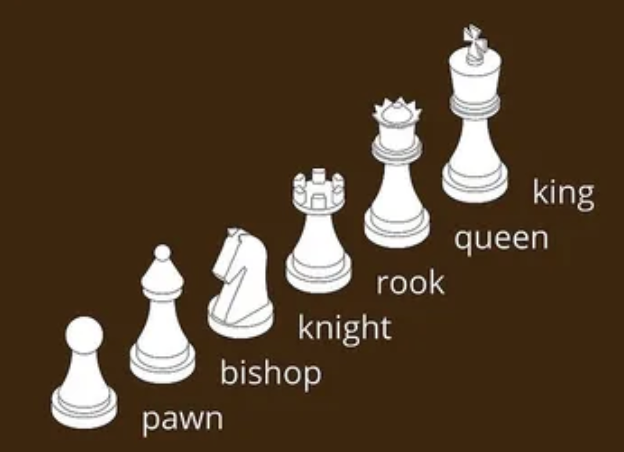

Chess board layout

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Initial", "Checkmate!")
)

# load an image
image_path = 'Lab-Introduction-Image-Processing/images/chess.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# resize
board = cv2.resize(image, (801, 801))

# initiate board
new_board = board.copy()
# put your code in here


# plot
fig.add_trace(
    px.imshow(board).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(new_board).data[0],
    row=1, col=2
)
fig.show()

**Image Thresholding**

*   This is a technique in computer vision to determine image pixels property based on
their intensity. The trick is straight forward. If a pixel value is higher than a threshold value, it
is assigned one value, else it is assigned another value. This technique can be used for
extracting regions of interest from the image as the mask.

**Bitwise Operators**

*   These are techniques for manipulating images. By applying pointwise logic operation
between images, we can generate many applications, for example inverting an image,
overlaying masks over an image, and removing the background.

**Morphological Transformations**

*   These are techniques for operating binary images based on its structure. By applying
a kernel to the structure boundary, we can generate erosion, dilation, and noise removed
images.

In [ ]:

# สร้างภาพเทาเรียบ (พื้นเทากลาง 128)
img = np.full((256, 256), 128, dtype=np.uint8)

# วาดวงกลมและสี่เหลี่ยมเพื่อให้เห็นพื้นหลังชัด
cv2.circle(img, (80, 80), 40, 200, -1)
cv2.rectangle(img, (150, 150), (230, 230), 60, -1)

# ฟังก์ชันสร้าง Salt & Pepper Noise
def add_salt_pepper(image, amount=0.05):
    """ amount = สัดส่วนพิกเซลที่จะถูกเปลี่ยน (0.05 = 5%) """
    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * amount / 2)
    num_pepper = num_salt

    # จุด salt (ขาว)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # จุด pepper (ดำ)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

# สร้างภาพมี noise
sp_3  = add_salt_pepper(img, 0.03)  # 3% noise
sp_10 = add_salt_pepper(img, 0.10)  # 10% noise

# Gaussian
gaussian = np.clip(img + np.random.normal(0, 20, img.shape), 0, 255).astype(np.uint8)

speckle = img + img * np.random.randn(*img.shape) * 0.2
speckle = np.clip(speckle, 0, 255).astype(np.uint8)

# Gaussian → ใช้ GaussianBlur
# gaussian_fixed = cv2.GaussianBlur(gaussian, (7,7), 0)
gaussian_fixed = cv2.fastNlMeansDenoising(gaussian, h=5, templateWindowSize=5, searchWindowSize=21)


# Salt & Pepper → ใช้ Median Filter
sp3_fixed  = cv2.medianBlur(sp_3, 3)
sp10_fixed = cv2.medianBlur(sp_10, 3)
# Speckle → ใช้ Bilateral Filter
speckle_fixed = cv2.bilateralFilter(speckle, 5, 75, 75)

# ---------- แสดงผล 2 แถว ----------
titles_row1 = ['Original', 'Gaussian Noise', 'Salt & Pepper (3%)', 'Salt & Pepper (10%)', 'Speckle Noise']
titles_row2 = ['Original', 'Gaussian → GaussianBlur', 'S&P 3% → Median', 'S&P 10% → Median', 'Speckle → Bilateral']
images_row1 = [img, gaussian, sp_3, sp_10, speckle]
images_row2 = [img, gaussian_fixed, sp3_fixed, sp10_fixed, speckle_fixed]

plt.figure(figsize=(14,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(images_row1[i], cmap='gray')
    plt.title(titles_row1[i], fontsize=9)
    plt.axis('off')
    plt.subplot(2,5,i+6)
    plt.imshow(images_row2[i], cmap='gray')
    plt.title(titles_row2[i], fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# example paths
folder = 'Lab-Introduction-Image-Processing/images/'
clips = folder + 'clips.jpg'

# load an image
image = cv2.imread(clips)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(image, cmap='gray')
fig.colorbar(im, ax=ax, fraction=0.032, pad=0.04)
ax.set_title('Grayscale Image with Colorbar')
plt.tight_layout()
plt.show()

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
print(height, width)

plt.hist(gray.ravel(), bins=256, range=(0,255))
plt.title('Histogram of Gray Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# get threshold
ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY) # more than 80 change to white

# invert an image
invert = cv2.bitwise_not(thresh)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

axes[2].imshow(invert, cmap='gray')
axes[2].set_title('Inverted Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Find contours

contours, hierarchy = cv2.findContours(image, mode, method)

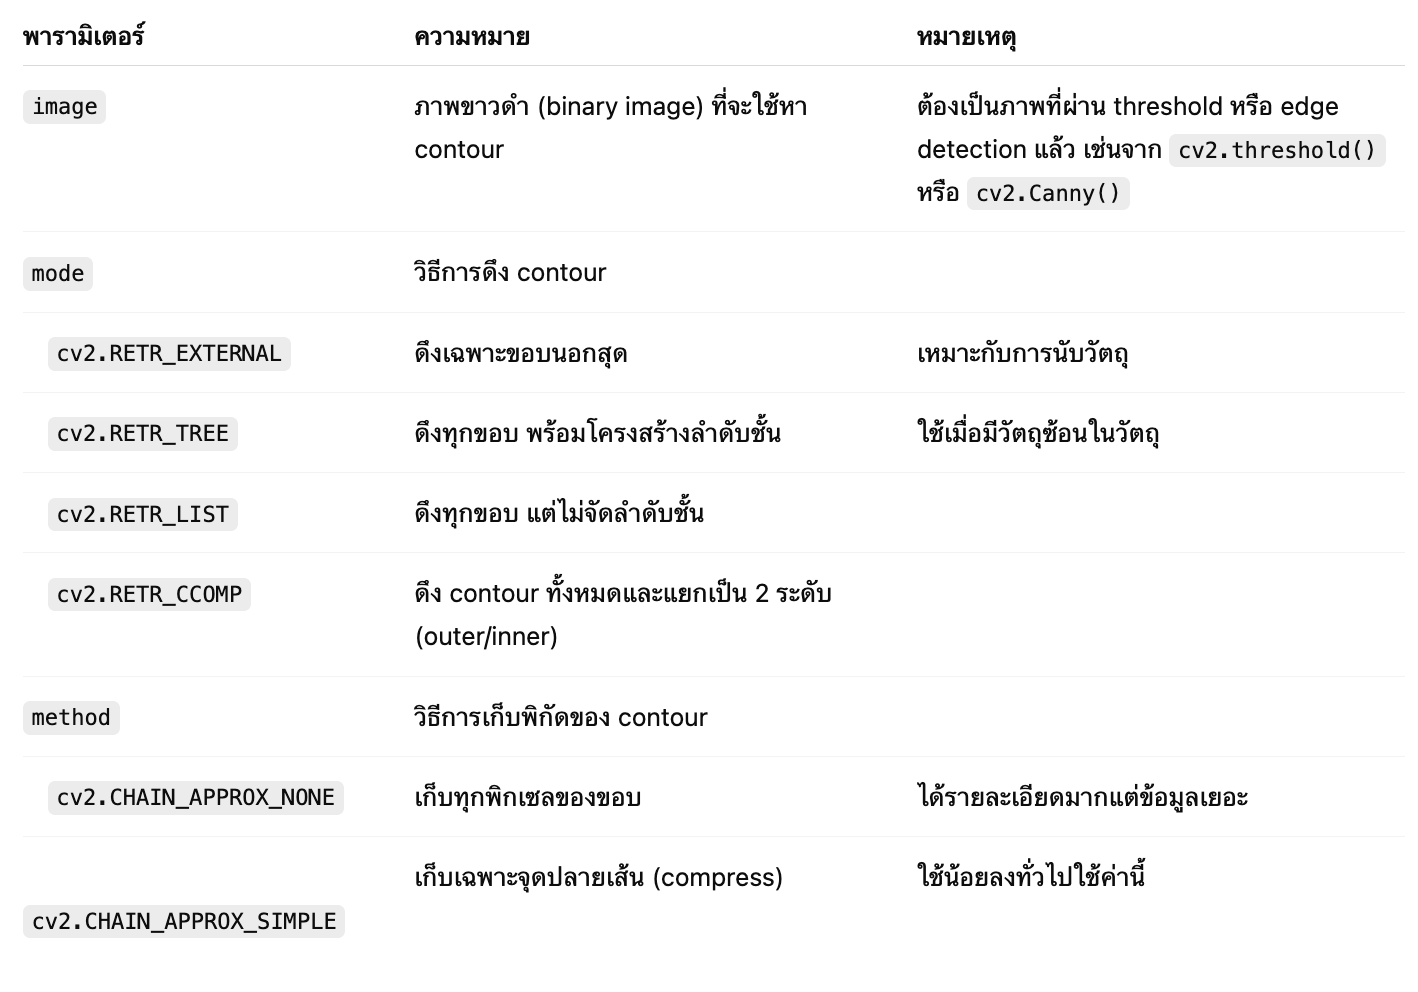

In [ ]:
kernel = np.ones((50,50), np.uint8)
opening = cv2.morphologyEx(invert, cv2.MORPH_OPEN, kernel)

# get contour
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# create an empty image for contours
border = np.zeros([height, width, 3])

# draw the contours on the empty image
# -1 หมายถึง วาดทุก contour ที่พบ (ถ้าต้องการเฉพาะบาง index สามารถระบุได้)
# (0,255,0) คือ สีเขียว (RGB)
# 3 คือ ความหนาของเส้นขอบ
cv2.drawContours(border, contours, -1, (0,255,0), 3)
border = border / 255.0 # normalize image


# print number of cells
print('count=', len(contours))

# plot
f, axs = plt.subplots(1, 3, figsize=(14,7))
plt.subplot(1, 3, 1)
plt.imshow(invert, cmap=plt.cm.gray)
plt.subplot(1, 3, 2)
plt.imshow(opening, cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(border);

plt.tight_layout()
plt.show()

In [ ]:
# example paths
older = 'Lab-Introduction-Image-Processing/images/hela/'
files = os.listdir(folder)

# config for plot
total = len(files)
fig, axes = plt.subplots(total, 2, figsize=(12, total * 4))

if total == 1:
    axes = np.array([axes])  # กรณีมีไฟล์เดียว จะให้ axes เป็น array 2D เสมอ

for i, file in enumerate(files):

    # load an image
    img = cv2.imread(os.path.join(folder, file))
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # put your code for thresholding 
    _, thresh = 

    # put your code for removing noise
    kernel = 
    opening = 

    # put your code for finding contours
    contours, _ = 
    cnt = len(contours)

    # plot grayscale
    im0 = axes[i, 0].imshow(gray, cmap='gray', vmin=0, vmax=10)
    axes[i, 0].set_title(file)
    axes[i, 0].axis("off")
    fig.colorbar(im0, ax=axes[i, 0], fraction=0.046, pad=0.04)

    # plot opening + count
    im1 = axes[i, 1].imshow(opening, cmap='gray', vmin=0, vmax=255)
    axes[i, 1].set_title(f'count = {cnt}')
    axes[i, 1].axis("off")
    fig.colorbar(im1, ax=axes[i, 1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [ ]:
folder = 'Lab-Introduction-Image-Processing/images/pills/'
file = '01.jpg'

# load an image
image = cv2.imread(folder + file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, depth = image.shape

# convert to grayscale
b, g, r = cv2.split(image)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(r, cmap='gray'); plt.title('Red Channel'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(g, cmap='gray'); plt.title('Green Channel'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(b, cmap='gray'); plt.title('Blue Channel'); plt.axis('off')
plt.show()


In [ ]:
plt.hist(b.ravel(), bins=256, range=(0,255), color='gray')
plt.xticks(range(0, 256, 25))
plt.title('Histogram of Gray Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# get threshold
ret, thresh = cv2.threshold(b, 180, 255, cv2.THRESH_BINARY)

# connect pills
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# get contour
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# plot
f, axs = plt.subplots(1,3, figsize=(15,15))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(closing, cmap=plt.cm.gray);
print('count = ' + str(len(contours)))

In [ ]:
def robust_hsv_of_label(hsv_img, label_mask, lbl):
    """
    คำนวณค่าสีเฉลี่ย (H, S, V) ของวัตถุใน label ที่กำหนด
    โดยลดผลรบกวนจากขอบหรือ noise
    """
    mask = (label_mask == lbl).astype(np.uint8)

    # ตัดขอบออกเล็กน้อยด้วย erosion เพื่อหลบขอบมืดหรือขอบเบลอ
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    inner_mask = cv2.erode(mask, kernel, iterations=1)

    # หาก erode แล้ววัตถุหาย ให้ใช้ mask เดิมแทน
    if np.sum(inner_mask) < 5:
        inner_mask = mask

    H = hsv_img[..., 0][inner_mask == 1]
    S = hsv_img[..., 1][inner_mask == 1]
    V = hsv_img[..., 2][inner_mask == 1]

    # ใช้ median แทน mean เพื่อให้ทน noise และเงา
    Hm = np.median(H) if len(H) > 0 else 0
    Sm = np.median(S) if len(S) > 0 else 0
    Vm = np.median(V) if len(V) > 0 else 0

    return np.array([Hm, Sm, Vm])

In [ ]:
# ใช้ HSV เพื่อแยกสีได้ทนต่อแสงกว่า
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# ----- ขั้นแยกวัตถุจากพื้นหลัง (รวมทุกสี) -----
# เน้นให้วัตถุสว่างกว่าพื้นหลัง (ปรับตามภาพจริง)
# เงื่อนไขตัวอย่าง: ค่า V สูงพอ และ S ไม่ต่ำจนเป็น noise เงา
Vmin_color, Smin_color = 60, 20      # วัตถุมีสี
Vmin_white, Smax_white = 170, 35     # วัตถุสีขาว: V สูง, S ต่ำ

mask_color = (hsv[...,2] > Vmin_color) & (hsv[...,1] > Smin_color)
mask_white = (hsv[...,2] > Vmin_white) & (hsv[...,1] < Smax_white)

fg_mask = (mask_color | mask_white).astype(np.uint8) * 255
plt.imshow(fg_mask, cmap='gray')


In [ ]:
# ใช้ HSV เพื่อแยกสีได้ทนต่อแสงกว่า
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# ----- ขั้นแยกวัตถุจากพื้นหลัง (รวมทุกสี) -----
# เน้นให้วัตถุสว่างกว่าพื้นหลัง (ปรับตามภาพจริง)
# เงื่อนไขตัวอย่าง: ค่า V สูงพอ และ S ไม่ต่ำจนเป็น noise เงา
Vmin_color, Smin_color = 60, 20      # วัตถุมีสี
Vmin_white, Smax_white = 170, 35     # วัตถุสีขาว: V สูง, S ต่ำ

mask_color = (hsv[...,2] > Vmin_color) & (hsv[...,1] > Smin_color)
mask_white = (hsv[...,2] > Vmin_white) & (hsv[...,1] < Smax_white)

fg_mask = (mask_color | mask_white).astype(np.uint8) * 255

# การเลือก kernel and Morphological Transformations: opening or closing  เพื่อทำให้วัตถุแยกออกจากกันชัดเจน
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
kernel = np.ones((5,5), np.uint8)
fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel, iterations=2)
fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# หาองค์ประกอบติดกัน (ชิ้นวัตถุ)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(fg_mask, connectivity=8)

# กรองชิ้นที่เล็กเกินไป
min_area = 200   # ปรับตามสเกลภาพ
keep = [i for i in range(1, num_labels) if stats[i, cv2.CC_STAT_AREA] >= min_area]

# ----- ขั้นจำแนกสีด้วยช่วง HSV -----
# ฟังก์ชันช่วย: ตรวจว่าสีเฉลี่ยของวัตถุอยู่ในช่วงไหน
def mean_hsv_of_label(label_id):
    mask = (labels == label_id)
    H = hsv[...,0][mask]; S = hsv[...,1][mask]; V = hsv[...,2][mask]
    return np.array([np.mean(H), np.mean(S), np.mean(V)])

# นิยามช่วงสี (ต้องปรับตามข้อมูลจริงของคุณ)
def classify_color(hsv_mean):
    H, S, V = hsv_mean
    # white: S ต่ำ & V สูง
    # yellow
    if 20 <= H < 35 and S >= 60 and V >= 80:
        return 'yellow'
    # green
    if 35 <= H < 85 and (S > 10 or S < 30) and V >= 200:
        return 'green'
    # orange
    if 8 <= H < 20 and S >= 65 and V >= 70:
        return 'orange'
    # red (สองช่วง: 0-10 และ 170-179)
    if (H < 10 or H >= 170) and S >= 80 and V >= 60:
        return 'red'
    # purple / magenta
    if 135 <= H < 170 and S >= 50 and V >= 50:
        return 'purple'
    # อื่น ๆ
    return 'white'

# นับตามสี + ทำ overlay
counts = {}
overlay = image.copy()
color_map = {
    'white': (255, 255, 255),
    'yellow': (255, 255, 0),
    'orange': (255, 165, 0),
    'red': (255, 0, 0),
    'green': (0, 255, 0),
    'purple': (180, 0, 255)
}

for idx, lbl in enumerate(keep, start=1):
    x, y, w, h, area = stats[lbl, 0], stats[lbl, 1], stats[lbl, 2], stats[lbl, 3], stats[lbl, 4]
    cx, cy     = map(int, centroids[lbl])
    hsv_mean = mean_hsv_of_label(lbl)
    color_name = classify_color(hsv_mean)
    counts[color_name] = counts.get(color_name, 0) + 1

    # วาดกรอบและป้ายสี (ใช้สีเขียนข้อความเป็นตัวแทนกลุ่ม)
    box_color = color_map.get(color_name, (0,255,0))
    cv2.rectangle(overlay, (x, y), (x+w, y+h), box_color, 5)
    hsv_m = robust_hsv_of_label(hsv, labels, lbl)
    text_label = f"Label {lbl}: {color_name}"
    cv2.putText(overlay, text_label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)  
    print(f"Label {lbl}: H={hsv_m[0]:.1f}, S={hsv_m[1]:.1f}, V={hsv_m[2]:.1f}")


plt.figure(figsize=(15,7))
plt.subplot(1,3,1); plt.imshow(image);   plt.title('Original (RGB)'); plt.axis('off')

# ต้องการให้สังเกตุการทำ mask
plt.subplot(1,3,2); plt.imshow(fg_mask, cmap='gray', vmin=0, vmax=255); plt.title('Foreground Mask'); plt.axis('off') 

plt.subplot(1,3,3); plt.imshow(overlay); plt.title('Overlay (Boxes/Labels)'); plt.axis('off')
plt.tight_layout()
plt.show()
print("Color classification:", counts)

In [ ]:
folder = 'Lab-Introduction-Image-Processing/images/malaria/'

# กรองเฉพาะไฟล์ภาพ
valid_ext = ('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp')
files = [f for f in os.listdir(folder) if f.lower().endswith(valid_ext)]
files.sort()

summary = []  # เก็บผลนับต่อไฟล์

for i, file in enumerate(files):
    # ---- load image (BGR) ----
    img_bgr = cv2.imread(os.path.join(folder, file))
    if img_bgr is None:
        print(f'[Skip]: {file}')
        continue

    h, w = img_bgr.shape[:2]
    b, g, r = cv2.split(img_bgr)

    bg = np.zeros((h, w), np.uint8)
    bg[r < 100] = 255
    _, thr_g = cv2.threshold(g, 115, 255, cv2.THRESH_BINARY)
    mask2 = cv2.bitwise_not(cv2.bitwise_or(bg, thr_g))
    ker = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    mask2 = cv2.morphologyEx(mask2, cv2.MORPH_OPEN, ker, iterations=1)
    mask2 = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, ker, iterations=1)

    cnts2, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if i == 0:
        plt.figure(figsize=(15,4))
        
        plt.subplot(1,3,1)
        plt.imshow(img_bgr)
        plt.title("Original Image")
        plt.axis("off")
        
        plt.subplot(1,3,2)
        plt.imshow(mask2, cmap='gray')
        plt.title("Binary Mask (mask2)")
        plt.axis("off")
        
        overlay = img_bgr.copy()
        cv2.drawContours(overlay, cnts2, -1, (0,255,0), 2)
        plt.subplot(1,3,3)
        plt.imshow(overlay)
        plt.title(f"Contours Detected = {len(cnts2)}")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()

    summary.append((file, len(cnts2)))

print('Contours detected')
for f, c2 in summary:
    print(f'{f:20s} -> {c2:3d}')
